<img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/fr/b/b1/Logo_EPF.png?raw=true"> 

**Introduction to Machine Learning - P2025: Energy & Environment**
# Lab 1:  Simple Linear Regression
*Credits*: Adapted from MDE's "Intro to ML" course by Y. Idrissi and I. Chafai.

**First name:** Maxence

**Last name:** Villecroze 

**Group:**


---

# Abstract
Linear regression and its many extensions are a workhorse of the statistics and data science community, both in application and as a reference point for other models. Most of the major concepts in machine learning can be and often are discussed in terms of various linear regression models. Thus, this section will introduce you to building and fitting linear regression models and some of the process behind it, so that you can:
 1) fit models to data you encounter 
 2) experiment with different kinds of linear regression and observe their effects 
 3) see some of the technology that makes regression models work.



# Learning Goals

Overall description and goal for the lab.

By the end of this lab, you should be able to:
* Understand array reshaping
* Review how to make plots
* Feel comfortable with simple linear regression



# Table of Contents

1. Simple linear regression on toy data
2. Linear regression with `sklearn`
4. Bonus: $k$-nearest neighbors


In [78]:
# import the necessary libraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

# Simple Linear regression with a toy dataset
We first examine a toy problem, focusing our efforts on fitting a linear model to a small dataset with three observations.  Each observation consists of one predictor $x_i$ and one response $y_i$ for $i = 1, 2, 3$,

\begin{align*}
(x , y) = \{(x_1, y_1), (x_2, y_2), (x_3, y_3)\}.
\end{align*}

To be very concrete, let's set the values of the predictors and responses.

\begin{equation*}
(x , y) = \{(1, 2), (2, 3), (3, 6)\}
\end{equation*}

There is no line of the form $\beta_0 + \beta_1 x = y$ that passes through all three observations, since the data are not collinear. Thus our aim is to find the line that best fits these observations in the *least-squares sense*, as discussed in lecture.

<div class="alert alert-info">

### 👉 Exercise (10 min)

* Make two numpy arrays `x_train` and `y_train`, containing the $(x,y)$ data points.
* Check the dimensions of these arrays with `.shape`.
* Make a nice scatterplot of the data using pandas + seaborn:
  1. Create a `pd.DataFrame` with both columns, giving each of them a title.
  2. Make a scatter plot using the `sns.scatterplot` 
  3. Give a title to the plot using the function `plt.title` (for instance `plt.title('my scatterplot')`)

</div>

In [79]:
# TODO: Make two numpy arrays out of this data, x_train and y_train
x_train = np.array([1,2,3])
y_train = np.array([2,3,6])
type(x_train)


numpy.ndarray

In [80]:
# TODO: Check the dimensions of these arrays
print(x_train.ndim)
print(y_train.ndim)


1
1


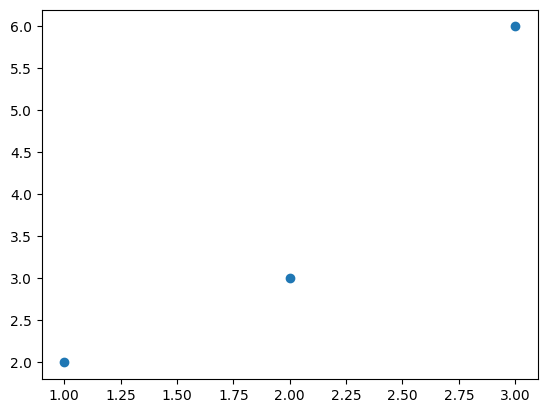

In [81]:
# TODO: Make a simple scatterplot
plt.scatter(x_train,y_train)

###  Building a model from scratch
In this part, we will solve the equations for simple linear regression and find the best fit solution to our toy problem.



#### Analytic solution
Linear regression is special among the models we study because it can be solved explicitly. While most other models (and even some advanced versions of linear regression) must be solved iteratively, linear regression has an analytic solution, where you can simply plug in the data.

For the single predictor case it is:
$$
    \begin{align}
      \beta_1 &= \frac{\sum_{i=1}^n{(x_i-\bar{x})(y_i-\bar{y})}}{\sum_{i=1}^n{(x_i-\bar{x})^2}}\\
      \beta_0 &= \bar{y} - \beta_1\bar{x}\
    \end{align}
$$
    
Where $\bar{y}$ and $\bar{x}$ are the mean of the y values and the mean of the x values, respectively.

From the re-aranged second equation we can see that the best-fit line  passes through $(\bar{x},\bar{y})$, the center of mass of the data (i.e. the average value, which you can compute using `np.mean`)

From any of the first equations, we can see that the slope of the line has to do with whether or not an x value that is above/below the center of mass is typically paired with a y value that is likewise above/below, or typically paired with one that is opposite.

The snippets of code below implement the linear regression equations on the observed predictors and responses, which we'll call the training data set.  Let's walk through the code in the next exercise.

<div class="alert alert-info">
<div class="exercise"><b>

#### 👉 Exercise (8 min)

</b></div>

Complete the code sections bellow in order to implement equations (1) and (2).

</div>

In [82]:
# TODO: first, compute means y_bar and x_bar
x_bar = x_train.mean()
y_bar = y_train.mean()


# TODO: build the two terms numerator and denominator from the formula above
num = sum((x_train-x_bar)*(y_train-x_bar))
denom = sum((x_train-x_bar)**2)

# TODO: check shapes of numerator and denominator and comment the result
num.shape,denom.shape

((), ())

<div class="alert alert-primary">

##### ❓ Why printing the shape returns empty brackets `( ) ( )`? 

**Answer here :** la methode s'attend à recevoir un tableau mais il ne recoit qu'un scalaire


</div>

In [83]:
# TODO: compute slope beta_1
beta_1 = num/denom

# TODO: compute intercept beta_0
beta_0 = y_bar - beta_1*x_bar

print("The best-fit line is {0:3.2f} + {1:3.2f} * x".format(beta_0, beta_1))

The best-fit line is -0.33 + 2.00 * x


<div class="alert alert-info">
<div class="exercise"><b>

#### 👉Exercise (10 min)

</b></div>

Turn the code from the above cells into a function called `simple_linear_regression_fit`, that inputs the training data and returns `beta0` and `beta1`.

To do this, complete the function code as needed, so that the training data becomes the input and the betas become the output.

Check your function by calling it with the training data from above and printing out the beta values.

</div>

In [84]:
# TODO: Your code here
def simple_linear_regression_fit(x_train: np.ndarray, y_train: np.ndarray) -> np.ndarray:
    """
    Inputs:
    x_train: a (N,) or (N by 1) array holding the values of the predictor variable,
             where N is the number of observations (samples).
    y_train: a (N,) or (N by 1) array holding the values of the response variable,
             where N is the number of observations (samples).
    Returns:
    beta_vals:  a (num_features by 1) array holding the intercept and slope coeficients
    """

    # first, compute means
    x_bar = x_train.mean()
    y_bar = y_train.mean()
    
    # build the two terms
    num = sum((x_train-x_bar)*(y_train-x_bar))
    denom = sum((x_train-x_bar)**2)

    # slope beta_1
    beta_1 = num/denom

    # intercept beta_0
    beta_0 = y_bar - beta_1*x_bar

    betas = np.array([beta_0,beta_1])
    return betas 

* Let's run this function and see the coefficients

In [85]:
# First we create some sample data to test
x_train = np.array([1 ,2, 3])
# Y values are roughly the triple of x plus one 
y_train = np.array([4.5, 6.4, 9.3])

betas = simple_linear_regression_fit(x_train, y_train)

beta_0 = betas[0]
beta_1 = betas[1]

print("The best-fit line is {0:8.6f} + {1:8.6f} * x".format(beta_0, beta_1))

The best-fit line is 1.933333 + 2.400000 * x


<div class="alert alert-primary">

##### Sanity check ❓ Do the values of `beta0` and `beta1` seem reasonable?

OUI

</div>

<div class="alert alert-info">

<div class="exercise"><b>

#### 👉 Exercise (5 min)

</b></div>

* Plot the training data using a scatter plot (`sns.scatterplot`).
* Calculate the y values predicted by your regression with `beta0` and `beta1`
* Then plot the best fit line together with the training data. The simplest way to it is to use `plt.plot` like so:
```python
# plot the line 
plt.plot(x_train, best_fit_y_values, label='best fit line')
# show legend box
plt.legend()
```


</div>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


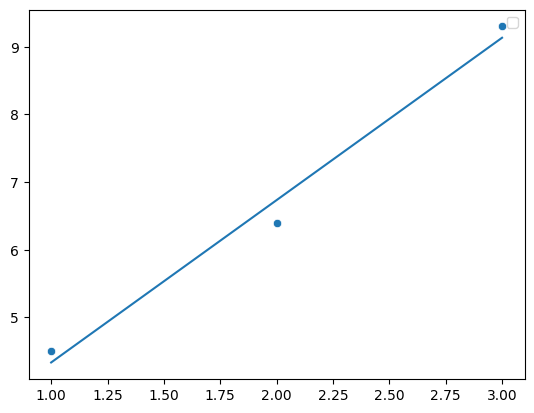

In [86]:
# TODO: Complete the code bellow
# plot the data with a scatter plot
sns.scatterplot(x=x_train,y=y_train)
# calculate the y values with y = beta_0 + beta_1 * x
betas = simple_linear_regression_fit(x_train,y_train)
best_fit_y_values = betas[0] + betas[1] * x_train
# plot the line 
plt.plot(x_train,best_fit_y_values)
plt.legend()

### Building a model with `sklearn`

Now that we can concretely fit the training data from scratch, let's learn a `python` package to do it all for us: [**Scikit-learn (`sklearn`)**](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

<img style="display: block; margin-left: auto; margin-right: auto; width: 30%;" src="https://upload.wikimedia.org/wikipedia/commons/0/05/Scikit_learn_logo_small.svg"></img>

Our goal is to show how to implement simple linear regression with these packages.  For an important sanity check, we compare the $\beta$ values from `sklearn` to the $\beta$ values that we found from above with our own implementation.

Now let's turn our attention to the `sklearn` library.

In [87]:
# Importing the module with linear models
from sklearn import linear_model

# build the least squares model (estimator)
toyregr = linear_model.LinearRegression()

<div class="aler alert-warning">

#### **⚠ Attention to the shapes**

`sklearn` is ready to take in multiple predictor variables. This means the input data `X` must resemble a table (i.e. a 2D array or a DataFrame).

Until now, the input data X has as single dimension. To add a second one, you can use numpy's method `.reshape`:

```python
x_train  = x_train.reshape([-1, 1])
```

</div>

<div class="aler alert-info">

#### 👉 Exercise (1min)
Reshape `x_train` so that is becomes a 2D array. Check you get the right shape bry printing `.shape` at the end.

</div>

In [88]:
# TODO reshape x_train so its shape gets to be (3, 1) 
x_train = x_train.reshape([-1,1])
x_train.shape



(3, 1)

Now data is ready to be used in the model:

In [89]:
# train the model by calling fit on the estimator object 'toyregr'
toyregr.fit(x_train, y_train)

# pull the beta parameters out from the estimator object 'toyregr'
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

print("The regression coefficients from the sklearn package are: beta_0 = {0:8.6f} and beta_1 = {1:8.6f}".format(beta0_skl, beta1_skl))

The regression coefficients from the sklearn package are: beta_0 = 1.933333 and beta_1 = 2.400000


<div class="alert alert-primary">

#### Sanity check ❓ Do the values of `beta0` and `beta1` match the ones you found before?

oui c'est les meme  


</div>

We should feel pretty good about ourselves now, and we're ready to move on to a real problem!

# The shape of things in `scikit-learn`
Before diving right in to a "real" problem, we really ought to discuss more of the details of `sklearn`.  We do this now.  Along the way, we'll import a real-world dataset.

`Scikit-learn` is the main `python` machine learning library. It consists of many learners which can learn models from data, as well as a lot of utility functions such as `train_test_split`. It can be used in `python` by the incantation `import sklearn`.

In scikit-learn, an **estimator** is a Python object that implements the methods `fit(X, y)` and `predict(T)`

Let's see the structure of `scikit-learn` needed to make these fits. `.fit` always takes two arguments <a href="#footnote-1">[1]</a>:
```python
  estimator.fit(Xtrain, ytrain)
```
We will consider two estimators in this lab: `LinearRegression` and (Bonus)`KNeighborsRegressor`.

Critically, `Xtrain` must be in the form of an *array of arrays* (or a 2x2 array) with the inner arrays each corresponding to one sample, and whose elements correspond to the predictor values (also known as **feature** values) for that sample (visuals coming in a moment).

`ytrain` on the other hand is a simple array of responses.  These are continuous for regression problems.


---
<p id="footnote-1"><small>[1] An exception to this rule is when using unsupervised estimators. In that case, the second argument is not necessary.</small></span>

# Regression on a real-world automobile dataset

You will work on a dataset about cars that you have available as a `csv` file. We can read that into our notebook using `pandas`.

See a description of the dataset here: https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars

In [90]:
import pandas as pd

#load mtcars
dfcars = pd.read_csv("mtcars.csv")
display(dfcars.head())
dfcars.info()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


Next, let's split the dataset into a training set and test set.

In [113]:
# split into training set and testing set
from sklearn.model_selection import train_test_split

# set random_state to get the same split every time
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

##### More about reshaping your data

In [116]:
# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


Now we have training and test data.  We still need to select a predictor and a response from this dataset.  Keep in mind that we need to choose the predictor and response from both the training and test set.  You will do this in the exercises below.  However, we provide some starter code for you to get things going.

In [117]:
# Extract the response variable that we're interested in: mileage per gallon (mpg)
y_train = traindf.mpg

Notice the shape of `y_train`.

In [122]:
np.shape(y_train)

(25,)

Another way to see the shape is to use the shape method.

In [119]:
y_train.shape

(25,)

This is *not* an "array of arrays".  That's okay!  Remember, `sklearn` requires an array of arrays only for the inpuy array `xtrain`!  You will have to pay close attention to this in the exercises later.

For now, let's discuss two ways out of this debacle.  All we'll do is get `y_train` to be an array of arrays.  This doesn't hurt anything because `sklearn` doesn't care too much about the shape of `y_train`.

First, let's reshape `y_train` to be an array of arrays using the `reshape` method.  We want the first dimension of `y_train` to be size $25$ and the second dimension to be size $1$.

In [123]:
y_train_reshape = y_train.values.reshape(y_train.shape[0], 1)

In [124]:
y_train_reshape.shape

(25, 1)

Notice that `y_train.shape[0]` gives the size of the first dimension.

There's an even easier way to get the correct shape right from the beginning.

In [125]:
y_train_reshape = traindf[['mpg']]

In [126]:
y_train_reshape.shape

(25, 1)

Finally, there is a nice shortcut to reshaping an array.  `numpy` can infer a dimension based on the other dimensions specified.

In [129]:
y_train_reshape = y_train.values.reshape(-1,1)
y_train_reshape.shape

(25, 1)

In this case, we said the second dimension should be size $1$.  Since the requirement of the `reshape()` method is that the requested dimensions be compatible, `numpy` decides the the first dimension must be size $25$.


<div class="alert alert-primary">

**Comprehension check** ❓ What would the `.shape` return if we did `y_train.values.reshape(-1,5)`?  
  
  
the second dimension will be 5 and the first one will be 5

</div>
Okay, enough of that.  The whole reason we went through that whole process was to show you how to reshape your data into the correct format.

<div class="alert alert-warning">

**IMPORTANT:** Remember that your response variable `ytrain` can be a vector but your predictor variable `xtrain` ***must*** be a 2D array!

</div>

### Implementing linear regression with `sklearn`
We will now use `sklearn` to predict automobile mileage per gallon (mpg) and evaluate these predictions. We already loaded the data and split them into a training set and a test set.

We need to choose the variables that we think will be good predictors for the dependent variable `mpg`. 

<div class="alert alert-info">
<div class="exercise"><b>

##### **👉 Exercise (10 min)**

</b></div>

* Pick one variable to use as a predictor for simple linear regression.  Use the markdown cell below and discuss your reasons.  
* Justify your choice with some visualizations.  _💡 Tip: why not try a `sns.pairplot` to explore the relationship between variables?_
* Is there a second variable you'd like to use? For example, we're not doing multiple linear regression here, but if we were, is there another variable you'd like to include if we were using two predictors?
</div>

Answer: Write your text answers here

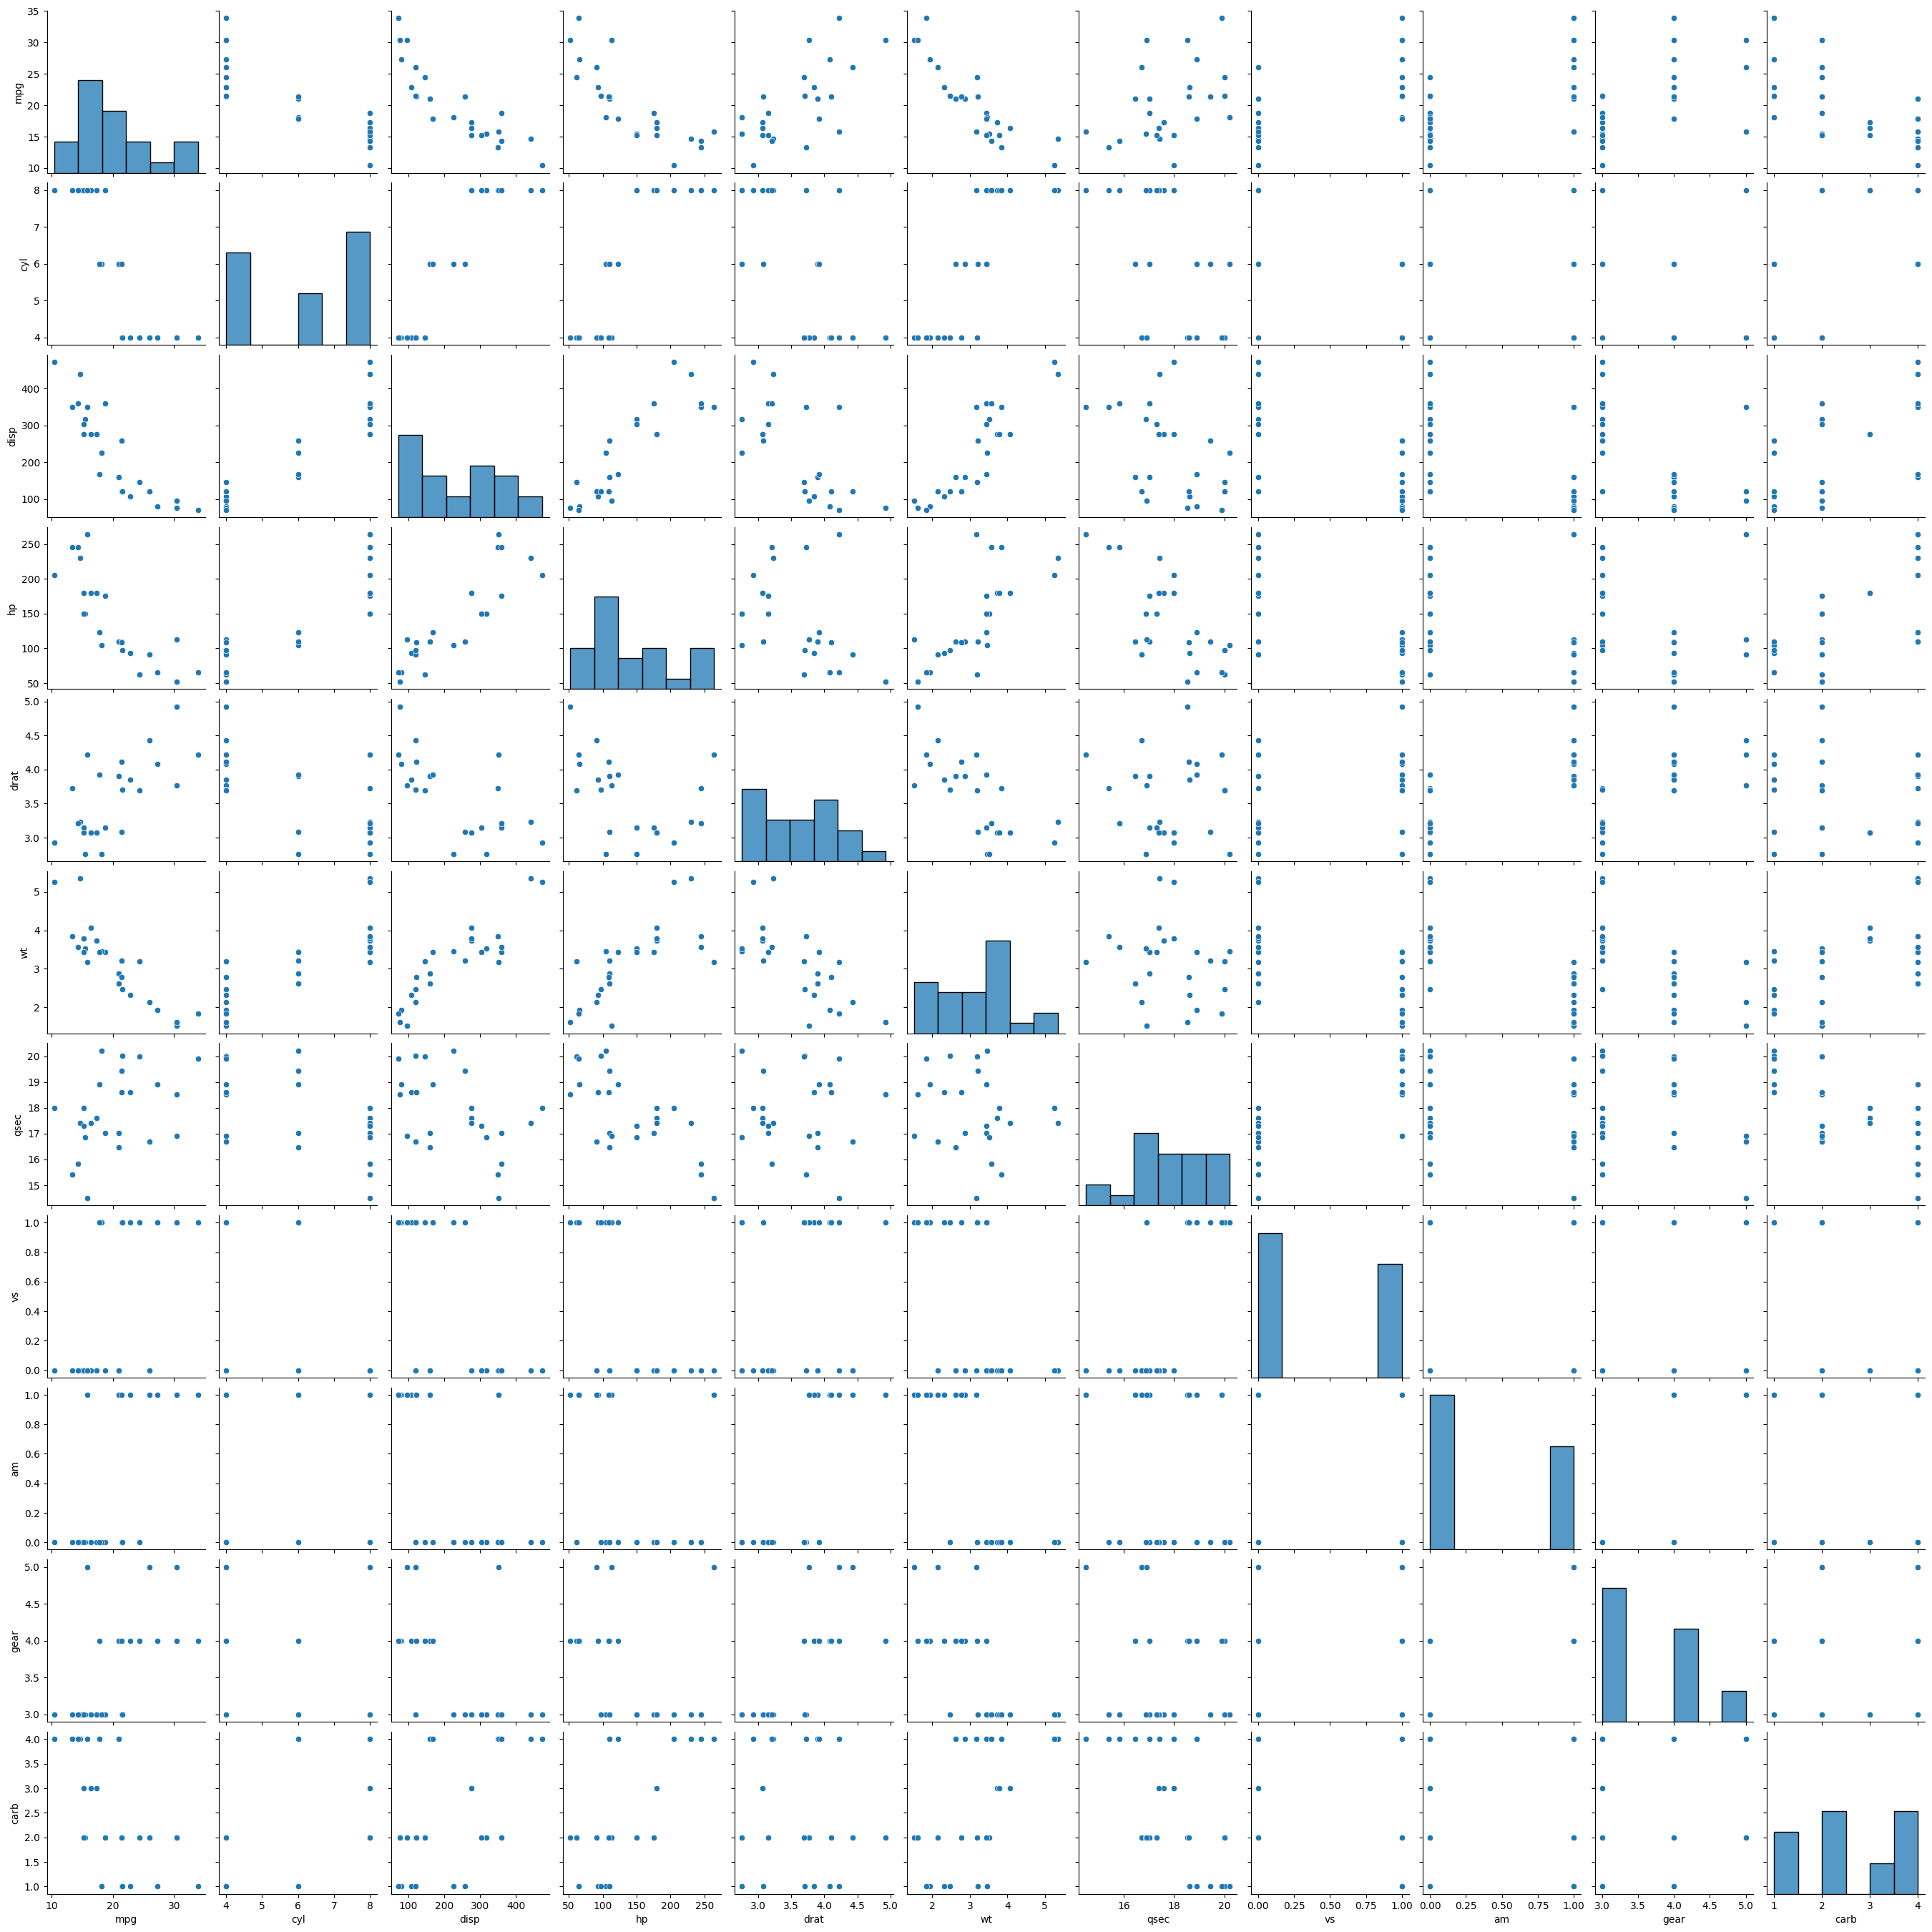

In [131]:
# Your code here
sns.pairplot(data=traindf)

#we want to use the wt variable

<div class="alert alert-info">
<div class="exercise"><b>

##### **👉 Exercise**

</b></div>

* Use `sklearn` to fit the training data using simple linear regression.
* Use the model to make mpg predictions on the test set.  
* Plot the data and the prediction.  
* Print out the mean squared error for the training set and the test set and compare.

**Tips:**
* Use the following to perform the analysis:
```python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
```

</div>

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

dfcars = pd.read_csv("mtcars.csv")

dfcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [150]:
# TODO: split traindf, testdf
traindf, testdf = train_test_split(dfcars, test_size=0.2, random_state=42)

# testing set is around 20% of the total data; training set is around 80%
print("Shape of full dataset is: {0}".format(dfcars.shape))
print("Shape of training dataset is: {0}".format(traindf.shape))
print("Shape of test dataset is: {0}".format(testdf.shape))

# TODO: compute y_train and x_train

y_train = traindf.mpg
x_train = traindf.disp
x_train_reshape = x_train.values.reshape([-1,1])

Shape of full dataset is: (32, 12)
Shape of training dataset is: (25, 12)
Shape of test dataset is: (7, 12)


8.367550539208677

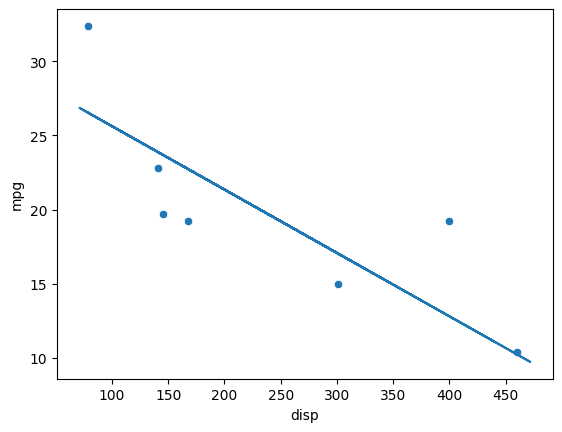

In [155]:
# TODO: compute y_test and x_test
y_test = testdf.mpg
x_test = testdf.disp
x_test_reshape = x_test.values.reshape([-1,1])
x_test_reshape.shape
# TODO: create linear model
toyregr.fit(x_train_reshape,y_train)
# TODO: fit linear model
beta0_skl = toyregr.intercept_
beta1_skl = toyregr.coef_[0]

# TODO: compute predicted_y
predicted_y = beta0_skl + beta1_skl * x_train

sns.scatterplot(x=x_test,y=y_test)
plt.plot(x_train,predicted_y)
# TODO: compute and r2 score on test data
mean_sqr = mean_squared_error(y_true=y_train,y_pred=predicted_y)
mean_sqr

In [105]:
# TODO r2 score on train data, mse on test data, mse on train data and final coefficients

In [106]:
# TODO: plots

## (Bonus) $k$-nearest neighbors

Great, so we did a simple linear regression on the car data.

Now that you're familiar with `sklearn`, you're ready to do a KNN regression.  Let's use $5$ nearest neighbors.


**Note**: this section uses pure `matplotlib` to do plots, without `seaborn` functions.

In [107]:
from sklearn.neighbors import KNeighborsRegressor
knnreg = KNeighborsRegressor(n_neighbors=5)

In [108]:
knnreg.fit(X_train, y_train)
r2 = knnreg.score(X_test, y_test)
r2

NameError: name 'X_train' is not defined

<div class="alert alert-info">
<div class="exercise"><b>

##### **👉 Exercise**

</b></div>

What is the $R^{2}$ score on the training set?

</div>

In [ ]:
# TODO: Your code here

Lets vary the number of neighbors and see what we get.

In [ ]:
regdict = {}
# Do a bunch of KNN regressions
for k in [1, 2, 4, 6, 8, 10, 15]:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(X_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary

In [ ]:
# Now let's plot it all
fig, ax = plt.subplots(1,1, figsize=(10,6))

ax.plot(dfcars.wt, dfcars.mpg, 'o', label="data")

xgrid = np.linspace(np.min(dfcars.wt), np.max(dfcars.wt), 100)
for k in [1, 2, 6, 10, 15]:
    predictions = regdict[k].predict(xgrid.reshape(100,1))
    if k in [1, 6, 15]:
        ax.plot(xgrid, predictions, label="{}-NN".format(k))

ax.legend();

Notice how the $1$-NN goes through every point on the training set but utterly fails elsewhere. Lets look at the scores on the training set.

In [ ]:
ks = range(1, 15) # Grid of k's
scores_train = [] # R2 scores
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k) # Create KNN model
    knnreg.fit(X_train, y_train) # Fit the model to training data
    score_train = knnreg.score(X_train, y_train) # Calculate R^2 score
    scores_train.append(score_train)

# Plot
fig, ax = plt.subplots(1,1, figsize=(12,8))
ax.plot(ks, scores_train,'o-')
ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$R^{2}$')

<div class="alert">

#### ❓ Why do we get a perfect $R^2$ at k=1?

</div>

<div class="alert alert-info">
<div class="exercise"><b>

##### **👉 Exercise**

</b></div>

* Make the same plot as above on the *test* set.
* What is the best $k$?

</div>

In [ ]:
# TODO: Your code here